# Simulando a geração de K pontos em um circulo de raio R com Simulação de Monte Carlo

Nesse notebook, estará toda a ánalise de dados referênte a simulação de Monte Carlos utilizada para validar dois modelos analíticos referentes a probabilidade da distribuição de pontos aleátórios k com distãncia variadas do centro de uma circuferência de raio R de forma a garantir a uniformidade na sua distribuição espacial (caso 1) e na sua distância para o centro da circunferência (caso 2).

Os parâmtros escolhidos para essa simulação foram:
* k: Número de pontos a serem distribuidos
* r: valores dos expoentes das pontências de base que definiram a quantidade de rodadas de simulação
* R: raio da circunferência
* t: forma como o pontos deveriam ser distribuidos
* seed: semente utilizada para reprodubilidade dos cenários

Para os experimentos, estes foram os valores escolhidos para cada parâmetro
* k: 30
* r: \[1,2,3,4,5,6\]
* R: 0.75
* t: [\0(cenário 1), 1(cenário 2)\]
* seed: 42

## Preparando o Ambiente

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached contourpy-1.2.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 26.9 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached contourpy-1.2.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (309 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating constants
POINST_FILENAME_SCENARIO_0 = "monte-carlo-simulation-points-0_42_30_6_0.750000.csv"
RESULTS_FILENAME_SCENARIO_0 = "monte-carlo-simulation-results-0_42_30_6_0.750000.csv"
POINST_FILENAME_SCENARIO_1 = "monte-carlo-simulation-points-1_42_30_6_0.750000.csv"
RESULTS_FILENAME_SCENARIO_1 = "monte-carlo-simulation-results-1_42_30_6_0.750000.csv"

R=6

In [3]:
results_s0_df = pd.read_csv('./../'+RESULTS_FILENAME_SCENARIO_0)
points_s0_df = pd.read_csv('./../'+POINST_FILENAME_SCENARIO_0)
results_s1_df = pd.read_csv('./../'+RESULTS_FILENAME_SCENARIO_1)
points_s1_df = pd.read_csv('./../'+POINST_FILENAME_SCENARIO_1)

In [7]:
def getExperimentSample(df:pd.DataFrame, r:int) -> pd.DataFrame:
    filtered_df = df[df['number-of-runs(r)'] == r]
    sampled_df = filtered_df.sample(n=filtered_df['number-of-points(k)'].iloc[0], random_state=1)
    
    return sampled_df

def getExperimentResults(df:pd.DataFrame, r:int) -> pd.DataFrame:
    filtered_df = df[df['number-of-runs(r)'] == r]
    
    return filtered_df

## Comparação das Probabilidades Geradas com Monte Carlo e Encontradas com o Modelo Analítico

### Monte Carlo

### Cenário 1

In [4]:
filtered_df = results_s0_df[results_s0_df['number-of-runs(r)'] == 1]
filtered_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,10.0,10.0,10.0,10.00,10.0,10.000000,10.000000,10.000000,0.0
mean,0.0,30.0,1.0,0.75,42.0,0.490885,0.033549,0.182936,NaN
std,0.0,0.0,0.0,0.00,0.0,0.035313,0.003624,0.009634,NaN
min,0.0,30.0,1.0,0.75,42.0,0.430663,0.029887,0.172880,NaN
25%,0.0,30.0,1.0,0.75,42.0,0.462033,0.031492,0.177459,NaN
50%,0.0,30.0,1.0,0.75,42.0,0.496863,0.032142,0.179277,NaN
75%,0.0,30.0,1.0,0.75,42.0,0.517392,0.035332,0.187963,NaN
max,0.0,30.0,1.0,0.75,42.0,0.532388,0.041857,0.204589,NaN


In [5]:
filtered_df = results_s0_df[results_s0_df['number-of-runs(r)'] == 2]
filtered_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,100.0,100.0,100.0,100.00,100.0,100.000000,100.000000,100.000000,0.0
mean,0.0,30.0,2.0,0.75,42.0,0.498061,0.031545,0.176782,NaN
std,0.0,0.0,0.0,0.00,0.0,0.032830,0.005969,0.017201,NaN
min,0.0,30.0,2.0,0.75,42.0,0.431933,0.015977,0.126399,NaN
25%,0.0,30.0,2.0,0.75,42.0,0.472479,0.026970,0.164227,NaN
50%,0.0,30.0,2.0,0.75,42.0,0.495001,0.032240,0.179553,NaN
75%,0.0,30.0,2.0,0.75,42.0,0.520647,0.035669,0.188862,NaN
max,0.0,30.0,2.0,0.75,42.0,0.574776,0.044220,0.210286,NaN


In [6]:
filtered_df = results_s0_df[results_s0_df['number-of-runs(r)'] == 3]
filtered_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,1000.0,1000.0,1000.0,1000.00,1000.0,1000.000000,1000.000000,1000.000000,0.0
mean,0.0,30.0,3.0,0.75,42.0,0.497963,0.031544,0.176501,NaN
std,0.0,0.0,0.0,0.00,0.0,0.031428,0.006993,0.019793,NaN
min,0.0,30.0,3.0,0.75,42.0,0.400013,0.011208,0.105866,NaN
25%,0.0,30.0,3.0,0.75,42.0,0.477537,0.026426,0.162561,NaN
50%,0.0,30.0,3.0,0.75,42.0,0.499138,0.031287,0.176880,NaN
75%,0.0,30.0,3.0,0.75,42.0,0.519885,0.036029,0.189813,NaN
max,0.0,30.0,3.0,0.75,42.0,0.592132,0.055357,0.235280,NaN


In [7]:
filtered_df = results_s0_df[results_s0_df['number-of-runs(r)'] == 4]
filtered_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,10000.0,10000.0,10000.0,10000.00,10000.0,10000.000000,10000.000000,10000.000000,0.0
mean,0.0,30.0,4.0,0.75,42.0,0.500123,0.031148,0.175368,NaN
std,0.0,0.0,0.0,0.00,0.0,0.032310,0.006946,0.019855,NaN
min,0.0,30.0,4.0,0.75,42.0,0.375669,0.010653,0.103213,NaN
25%,0.0,30.0,4.0,0.75,42.0,0.479139,0.026349,0.162322,NaN
50%,0.0,30.0,4.0,0.75,42.0,0.500968,0.030843,0.175623,NaN
75%,0.0,30.0,4.0,0.75,42.0,0.521961,0.035654,0.188823,NaN
max,0.0,30.0,4.0,0.75,42.0,0.616552,0.060109,0.245172,NaN


In [8]:
filtered_df = results_s0_df[results_s0_df['number-of-runs(r)'] == 5]
filtered_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,100000.0,100000.0,100000.0,100000.00,100000.0,100000.000000,100000.000000,100000.000000,0.0
mean,0.0,30.0,5.0,0.75,42.0,0.500220,0.031230,0.175614,NaN
std,0.0,0.0,0.0,0.00,0.0,0.032244,0.006908,0.019738,NaN
min,0.0,30.0,5.0,0.75,42.0,0.354646,0.005693,0.075455,NaN
25%,0.0,30.0,5.0,0.75,42.0,0.478673,0.026420,0.162541,NaN
50%,0.0,30.0,5.0,0.75,42.0,0.500587,0.030982,0.176017,NaN
75%,0.0,30.0,5.0,0.75,42.0,0.522450,0.035779,0.189153,NaN
max,0.0,30.0,5.0,0.75,42.0,0.630077,0.062358,0.249716,NaN


In [9]:
filtered_df = results_s0_df[results_s0_df['number-of-runs(r)'] == 6]
filtered_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,1000000.0,1000000.0,1000000.0,1000000.00,1000000.0,1000000.000000,1000000.000000,1000000.000000,0.0
mean,0.0,30.0,6.0,0.75,42.0,0.500043,0.031248,0.175661,NaN
std,0.0,0.0,0.0,0.00,0.0,0.032272,0.006920,0.019769,NaN
min,0.0,30.0,6.0,0.75,42.0,0.340432,0.005968,0.077254,NaN
25%,0.0,30.0,6.0,0.75,42.0,0.478498,0.026410,0.162512,NaN
50%,0.0,30.0,6.0,0.75,42.0,0.500596,0.031010,0.176097,NaN
75%,0.0,30.0,6.0,0.75,42.0,0.522182,0.035807,0.189227,NaN
max,0.0,30.0,6.0,0.75,42.0,0.641224,0.068408,0.261550,NaN


### Cenário 2

In [10]:
filtered_df = results_s1_df[results_s1_df['number-of-runs(r)'] == 1]
filtered_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,10.0,10.0,10.0,10.00,10.0,10.000000,10.000000,10.000000,0.0
mean,1.0,30.0,1.0,0.75,42.0,0.395360,0.049296,0.220955,NaN
std,0.0,0.0,0.0,0.00,0.0,0.039586,0.009769,0.022964,NaN
min,1.0,30.0,1.0,0.75,42.0,0.344927,0.030159,0.173662,NaN
25%,1.0,30.0,1.0,0.75,42.0,0.369911,0.044600,0.211169,NaN
50%,1.0,30.0,1.0,0.75,42.0,0.379680,0.050371,0.224420,NaN
75%,1.0,30.0,1.0,0.75,42.0,0.437051,0.057278,0.239302,NaN
max,1.0,30.0,1.0,0.75,42.0,0.445059,0.061704,0.248403,NaN


In [11]:
filtered_df = results_s1_df[results_s1_df['number-of-runs(r)'] == 2]
filtered_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,100.0,100.0,100.0,100.00,100.0,100.000000,100.000000,100.000000,0.0
mean,1.0,30.0,2.0,0.75,42.0,0.371324,0.045853,0.213283,NaN
std,0.0,0.0,0.0,0.00,0.0,0.043305,0.008169,0.019170,NaN
min,1.0,30.0,2.0,0.75,42.0,0.217470,0.023112,0.152027,NaN
25%,1.0,30.0,2.0,0.75,42.0,0.344775,0.040191,0.200477,NaN
50%,1.0,30.0,2.0,0.75,42.0,0.374136,0.045246,0.212710,NaN
75%,1.0,30.0,2.0,0.75,42.0,0.401046,0.051511,0.226959,NaN
max,1.0,30.0,2.0,0.75,42.0,0.469399,0.074748,0.273401,NaN


In [12]:
filtered_df = results_s1_df[results_s1_df['number-of-runs(r)'] == 3]
filtered_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,1000.0,1000.0,1000.0,1000.00,1000.0,1000.000000,1000.000000,1000.000000,0.0
mean,1.0,30.0,3.0,0.75,42.0,0.375546,0.046986,0.215913,NaN
std,0.0,0.0,0.0,0.00,0.0,0.039716,0.008234,0.019176,NaN
min,1.0,30.0,3.0,0.75,42.0,0.257605,0.023839,0.154399,NaN
25%,1.0,30.0,3.0,0.75,42.0,0.348896,0.041439,0.203567,NaN
50%,1.0,30.0,3.0,0.75,42.0,0.376561,0.046837,0.216419,NaN
75%,1.0,30.0,3.0,0.75,42.0,0.402035,0.052634,0.229421,NaN
max,1.0,30.0,3.0,0.75,42.0,0.503316,0.072741,0.269706,NaN


In [13]:
filtered_df = results_s1_df[results_s1_df['number-of-runs(r)'] == 4]
filtered_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,10000.0,10000.0,10000.0,10000.00,10000.0,10000.000000,10000.000000,10000.000000,0.0
mean,1.0,30.0,4.0,0.75,42.0,0.374361,0.046963,0.215921,NaN
std,0.0,0.0,0.0,0.00,0.0,0.039232,0.007951,0.018480,NaN
min,1.0,30.0,4.0,0.75,42.0,0.223681,0.019591,0.139968,NaN
25%,1.0,30.0,4.0,0.75,42.0,0.347838,0.041505,0.203726,NaN
50%,1.0,30.0,4.0,0.75,42.0,0.374560,0.046834,0.216411,NaN
75%,1.0,30.0,4.0,0.75,42.0,0.400958,0.052205,0.228483,NaN
max,1.0,30.0,4.0,0.75,42.0,0.512466,0.076392,0.276392,NaN


In [14]:
filtered_df = results_s1_df[results_s1_df['number-of-runs(r)'] == 5]
filtered_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,100000.0,100000.0,100000.0,100000.00,100000.0,100000.000000,100000.000000,100000.000000,0.0
mean,1.0,30.0,5.0,0.75,42.0,0.375001,0.046873,0.215709,NaN
std,0.0,0.0,0.0,0.00,0.0,0.039372,0.007956,0.018519,NaN
min,1.0,30.0,5.0,0.75,42.0,0.223786,0.016488,0.128406,NaN
25%,1.0,30.0,5.0,0.75,42.0,0.348394,0.041382,0.203426,NaN
50%,1.0,30.0,5.0,0.75,42.0,0.375004,0.046736,0.216185,NaN
75%,1.0,30.0,5.0,0.75,42.0,0.401644,0.052188,0.228447,NaN
max,1.0,30.0,5.0,0.75,42.0,0.551460,0.082536,0.287291,NaN


In [15]:
filtered_df = results_s1_df[results_s1_df['number-of-runs(r)'] == 6]
filtered_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,1000000.0,1000000.0,1000000.0,1000000.00,1000000.0,1000000.000000,1000000.000000,1000000.000000,0.0
mean,1.0,30.0,6.0,0.75,42.0,0.375038,0.046881,0.215725,NaN
std,0.0,0.0,0.0,0.00,0.0,0.039526,0.007969,0.018548,NaN
min,1.0,30.0,6.0,0.75,42.0,0.198629,0.012180,0.110361,NaN
25%,1.0,30.0,6.0,0.75,42.0,0.348287,0.041393,0.203453,NaN
50%,1.0,30.0,6.0,0.75,42.0,0.375053,0.046712,0.216129,NaN
75%,1.0,30.0,6.0,0.75,42.0,0.401768,0.052205,0.228483,NaN
max,1.0,30.0,6.0,0.75,42.0,0.564063,0.089228,0.298710,NaN


## Comparação dos Pontos Gerados com Monte Carlo e Encontradas com o Modelo Analítico

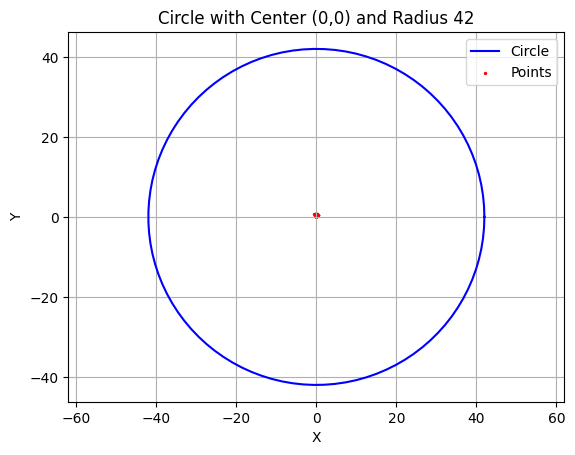

In [9]:
# Assuming you have already read the CSV file and stored it in points_df

points_df = getExperimentSample(points_s0_df, R)

# Extract radius from DataFrame
radius = points_df['radius'].iloc[0]

# Create data points to plot the circle
theta = np.linspace(0, 2*np.pi, 100)
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the circle with center (0,0)
ax.plot(x_circle, y_circle, label='Circle', color='b')

# Plot the points (optional)
ax.scatter(points_df['x'], points_df['y'], color='r', label='Points', s=2)

# Set plot limits based on the maximum absolute value of x and y coordinates
max_range = max(np.abs(points_df[['x', 'y']].values).max(), radius)
ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Circle with Center (0,0) and Radius {}'.format(radius))

# Add legend (optional)
ax.legend()

# Show the plot
plt.grid(True)
plt.axis('equal')  # Equal aspect ratio ensures the circle is circular
plt.show()

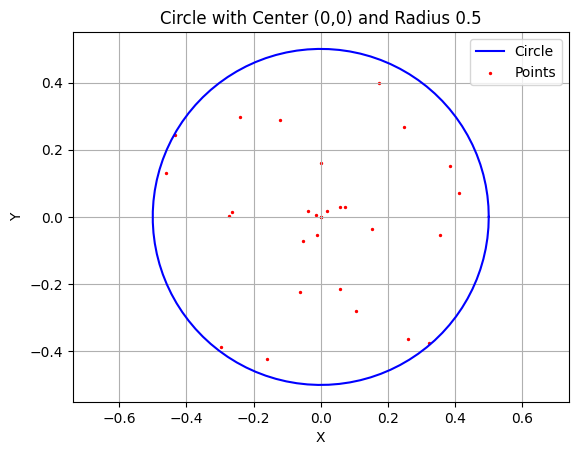

In [13]:
# Assuming you have already read the CSV file and stored it in points_df

points_df = getExperimentSample(points_s1_df, R)

# Extract radius from DataFrame
radius = points_df['radius'].iloc[0]

# Create data points to plot the circle
theta = np.linspace(0, 2*np.pi, 100)
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the circle with center (0,0)
ax.plot(x_circle, y_circle, label='Circle', color='b')

# Plot the points (optional)
ax.scatter(points_df['x'], points_df['y'], color='r', label='Points', s=2)

# Set plot limits based on the maximum absolute value of x and y coordinates
max_range = max(np.abs(points_df[['x', 'y']].values).max(), radius)
ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Circle with Center (0,0) and Radius {}'.format(radius))

# Add legend (optional)
ax.legend()

# Show the plot
plt.grid(True)
plt.axis('equal')  # Equal aspect ratio ensures the circle is circular
plt.show()

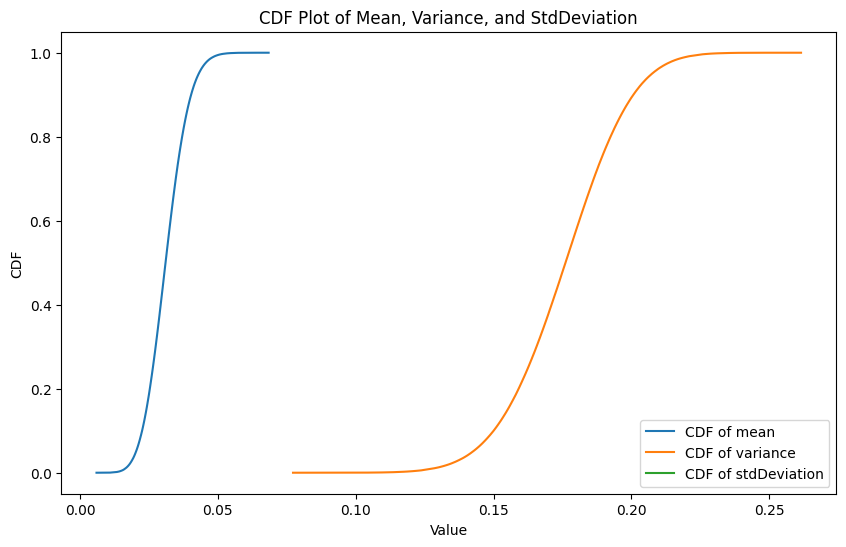

In [8]:
results_df = getExperimentResults(results_s0_df, R)

results_df_sorted = results_df.sort_values(by='run-id(rid)')

# Define the columns to plot
columns_to_plot = ['mean', 'variance', 'stdDeviation']

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot CDF for each column
for column in columns_to_plot:
    sorted_data = np.sort(results_df_sorted[column])
    yvals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, yvals, label=f"CDF of {column}")

# Add labels and title
plt.xlabel("Value")
plt.ylabel("CDF")
plt.title("CDF Plot of Mean, Variance, and StdDeviation")
plt.legend()

# Show the plot
plt.show()

1000000


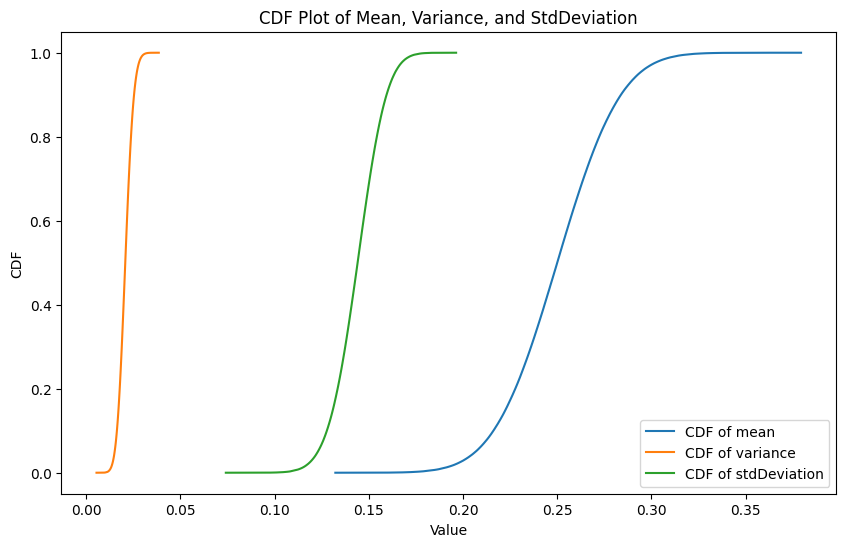

In [20]:
results_df = getExperimentResults(results_s1_df, R)

results_df_sorted = results_df.sort_values(by='run-id(rid)')

# Define the columns to plot
columns_to_plot = ['mean', 'variance', 'stdDeviation']

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot CDF for each column
for column in columns_to_plot:
    sorted_data = np.sort(results_df_sorted[column])
    yvals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, yvals, label=f"CDF of {column}")

# Add labels and title
plt.xlabel("Value")
plt.ylabel("CDF")
plt.title("CDF Plot of Mean, Variance, and StdDeviation")
plt.legend()

# Show the plot
plt.show()

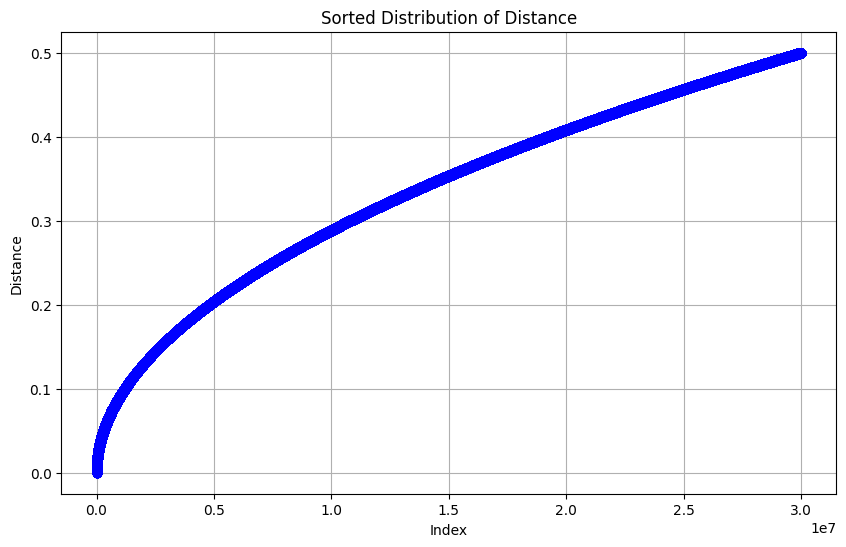

In [23]:
# Sort the 'distance' column
points_df = getExperimentResults(points_s0_df, R)

sorted_distance = points_df['distance'].sort_values().reset_index(drop=True)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the sorted 'distance' values
plt.plot(sorted_distance, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Distance")
plt.title("Sorted Distribution of Distance")
plt.grid(True)

# Show the plot
plt.show()

In [26]:
# Sort the 'distance' column
points_df = getExperimentResults(points_s1_df, R)

sorted_distance = points_df['distance'].sort_values().reset_index(drop=True)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the sorted 'distance' values
plt.plot(sorted_distance, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Distance")
plt.title("Sorted Distribution of Distance")
plt.grid(True)

# Show the plot
plt.show()

KeyError: 'distance'

<Figure size 1000x600 with 0 Axes>